# QNPY: Analysis of COVID-19 cases time series

#### Import packages:

In [1]:
import QNPy #Importing the package
import matplotlib.pyplot as plt
import pandas as pd

from QNPy import Preprocess as pr #Importing Preprocess module from the package
from QNPy.Preprocess import * #importing all external packages from Preprocess
from QNPy import SPLITTING_AND_TRAINING as st #Importing SPLITTING_AND_TRAINING module from the package
from QNPy.SPLITTING_AND_TRAINING import * #Importing all packages from SPLITTING_AND_TRAINING module

### 1. Transform the data

In [2]:
# Absolute path to the data:
path_cases = r'C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\data\cumulative_cases_qnpy'
# We want to select all .csv files in the directory:
csv_files = glob.glob(path_cases + "/*.csv")
df_list = (pd.read_csv(file) for file in csv_files)
data = pd.concat(df_list, ignore_index=True)

In [3]:
data

,mjd,mag,magerr
0,0.0,0.0,0.05
1,1.0,37.0,0.05
2,2.0,44.0,0.05
3,3.0,60.0,0.05
4,4.0,67.0,0.05
...,...,...,...
700375,233.0,9444.0,0.05
700376,234.0,9444.0,0.05
700377,235.0,9444.0,0.05
700378,236.0,9464.0,0.05


#### Padding:
Padding the data includes adding zeros or a specific value at the end of the sequence, which makes all sequences the same length. As our data has approximately 250 observations, we will set `desired_observations` to 300. <br>
Types of padding:
1. Zero padding: adding zeros at the end of timeseries
2. Mean padding: adding mean value of the sequence at the end of timeseries
3. Backward padding: adding the last value to the end of the sequence
4. Forward padding: adding first value at the beginning of the sequence

As number of COVID-19 counts reach saturation at the end of the peak (we have a sigmoid, as we saw earlier), *backward padding* is the most reasonable option, as it will only make the plato longer, which is exactly what happens in reality.

You can read more about padding [here](https://medium.com/full-metal-data-scientist/an-introduction-to-time-series-padding-techniques-in-python-b7307a2eba87)

In [2]:
source_dir = r'C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\data\cumulative_cases_qnpy'
target_dir = r'C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\data\cumulative_cases_padded'
padding= pr.backward_pad_curves(source_dir,target_dir , desired_observations=300)

Created new file: C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\data\cumulative_cases_padded\10001_cases.csv
Created new file: C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\data\cumulative_cases_padded\10003_cases.csv
Created new file: C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\data\cumulative_cases_padded\10005_cases.csv
Created new file: C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\data\cumulative_cases_padded\1001_cases.csv
Created new file: C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\data\cumulative_cases_padded\1003_cases.csv
Created new file: C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\data\cumulative_cases_padded\1005_cases.csv
Created new file: C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\data\cumulat

Let's see how our padded data looks like on one example:

In [6]:
padded_example_path = r'C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\data\cumulative_cases_padded\6037_cases.csv'
padded_df = pd.read_csv(padded_example_path)
padded_df.tail(10)

,mjd,mag,magerr
291,235.0,937970.0,0.05
292,235.2,937970.0,0.05
293,235.4,937970.0,0.05
294,235.6,937970.0,0.05
295,235.8,937970.0,0.05
296,236.0,937970.0,0.05
297,236.2,937970.0,0.05
298,236.4,937970.0,0.05
299,236.6,937970.0,0.05
300,236.8,937970.0,0.05


#### Transformation:
Before entering a neural network model, data needs to be standardized in a certain way. Depending on the data (e.g. distribution) different scaler can be used (standard, robust,...)
Data augmentation is common in neural network model. It is a way to reduce over-fitting, as each of the transformed time series is in a way different from the original. Although this data set is relatively large and augmentation might not be necessary, for the sake of completeness it is performed below.

You can read more about data augmentation [here](https://towardsdatascience.com/time-series-augmentations-16237134b29b).

In [7]:
SOURCE = r'C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\data\cumulative_cases_padded'
TARGET = r'C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\data\cumulative_cases_preproc'
files = os.listdir(SOURCE)
number_of_points, trcoeff = pr.transform_and_save(files, SOURCE, TARGET, transform)

In [8]:
original = pd.read_csv(r'C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\data\cumulative_cases_preproc\6037_cases_original.csv')
plus = pd.read_csv(r'C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\data\cumulative_cases_preproc\6037_cases_plus.csv')
minus = pd.read_csv(r'C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\data\cumulative_cases_preproc\6037_cases_minus.csv')

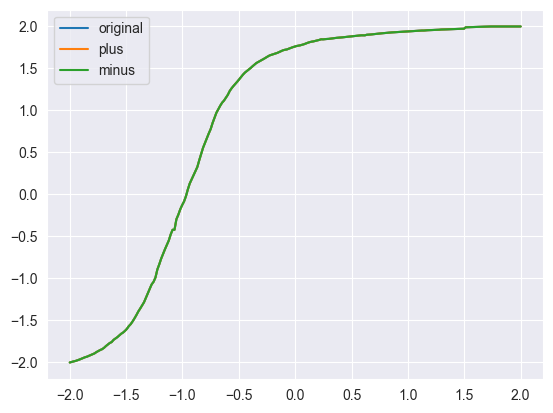

In [12]:
plt.plot(original.time, original.cont, label= "original")
plt.plot(plus.time, plus.cont, label= "plus")
plt.plot(minus.time, minus.cont, label= "minus")
plt.legend()
plt.show()

### 2. Split the data
Data is next split in train, test and validation set

In [15]:
DATA_SRC = r'C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\data\cumulative_cases_preproc' #Path to transformed data

In [16]:
files = os.listdir(DATA_SRC) #listing the transformed data

In [17]:
display(files)

['10001_cases_minus.csv',
 '10001_cases_original.csv',
 '10001_cases_plus.csv',
 '10003_cases_minus.csv',
 '10003_cases_original.csv',
 '10003_cases_plus.csv',
 '10005_cases_minus.csv',
 '10005_cases_original.csv',
 '10005_cases_plus.csv',
 '1001_cases_minus.csv',
 '1001_cases_original.csv',
 '1001_cases_plus.csv',
 '1003_cases_minus.csv',
 '1003_cases_original.csv',
 '1003_cases_plus.csv',
 '1005_cases_minus.csv',
 '1005_cases_original.csv',
 '1005_cases_plus.csv',
 '1007_cases_minus.csv',
 '1007_cases_original.csv',
 '1007_cases_plus.csv',
 '1009_cases_minus.csv',
 '1009_cases_original.csv',
 '1009_cases_plus.csv',
 '1011_cases_minus.csv',
 '1011_cases_original.csv',
 '1011_cases_plus.csv',
 '1013_cases_minus.csv',
 '1013_cases_original.csv',
 '1013_cases_plus.csv',
 '1015_cases_minus.csv',
 '1015_cases_original.csv',
 '1015_cases_plus.csv',
 '1017_cases_minus.csv',
 '1017_cases_original.csv',
 '1017_cases_plus.csv',
 '1019_cases_minus.csv',
 '1019_cases_original.csv',
 '1019_cases_p

In [18]:
#path to TRAIN, TEST and VAL folders where your split data will be saved.
#You can directly enter this information in split_data function
TRAIN_FOLDER = './dataset/train/'
TEST_FOLDER = './dataset/test/'
VAL_FOLDER = './dataset/val/'

In [19]:
st.split_data(files, DATA_SRC, TRAIN_FOLDER, TEST_FOLDER, VAL_FOLDER)

100%|██████████| 9030/9030 [00:22<00:00, 402.29it/s]


In [20]:
# Check the sizes of train, test and val:
def count_files(dir_path):
    count = 0
    # Iterate directory
    for path in os.listdir(dir_path):
        # check if current path is a file
        if os.path.isfile(os.path.join(dir_path, path)):
            count += 1
    print('File count:', count)

In [21]:
print("Train data:")
count_files(TRAIN_FOLDER)
print("Test data:")
count_files(TEST_FOLDER)
print("Validation data:")
count_files(VAL_FOLDER)

Train data:
File count: 7186
Test data:
File count: 961
Validation data:
File count: 883


# 3. Train the model

Define the paths:

In [22]:
DATA_PATH_TRAIN = "./dataset/train" #path to train folder
DATA_PATH_VAL = "./dataset/val" #path to val folder

MODEL_PATH = "./output/cnp_model.pth" #path for saving model

BATCH_SIZE=32

In [23]:
#running the function for getting the data loaders of data that are going to be trained
trainLoader, valLoader = st.get_data_loaders(DATA_PATH_TRAIN, DATA_PATH_VAL, BATCH_SIZE)

In [24]:
#defining the device for testing, it can be CPU of CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

Create the model:

In [25]:
model, optimizer, criterion, mseMetric, maeMetric = st.create_model_and_optimizer(device)

We will train the model for 100 epochs and save history

In [26]:
#function for training the data
#1 - number of training runs
#100 - number of epochs
#50 - number of early stopping limit
history_loss_train, history_loss_val, \
    history_mse_train, history_mse_val, \
    history_mae_train, history_mae_val, \
    epoch_counter_train_loss, epoch_counter_train_mse, \
    epoch_counter_train_mae, epoch_counter_val_loss, \
    epoch_counter_val_mse, epoch_counter_val_mae = st.train_model(
    model, trainLoader, valLoader, criterion, optimizer, 1, 100, 50, mseMetric, maeMetric, device)

100%|██████████| 100/100 [38:45<00:00, 23.25s/it]


In [27]:
# Define the file names for saving the lists for all histories
file_names = ["history_loss_train.csv", "history_loss_val.csv", "history_mse_train.csv", "history_mse_val.csv",
              "history_mae_train.csv", "history_mae_val.csv", "epoch_counter_train_loss.csv",
              "epoch_counter_train_mse.csv", "epoch_counter_train_mae.csv", "epoch_counter_val_loss.csv",
              "epoch_counter_val_mse.csv", "epoch_counter_val_mae.csv"]

# Define the lists
lists = [history_loss_train, history_loss_val, history_mse_train, history_mse_val, history_mae_train,
         history_mae_val, epoch_counter_train_loss, epoch_counter_train_mse, epoch_counter_train_mae,
         epoch_counter_val_loss, epoch_counter_val_mse, epoch_counter_val_mae]

In [28]:
#running the function for saving all lists with histories
save_list= st.save_lists_to_csv(file_names, lists)

In [29]:
# Replace with the path to your history_loss_train CSV file
history_loss_train_file = './history_loss_train.csv'
# Replace with the path to your history_loss_val CSV file
history_loss_val_file = './history_loss_val.csv'
# Replace with the path to your epoch_counter_train_loss CSV file
epoch_counter_train_loss_file = './epoch_counter_train_loss.csv'

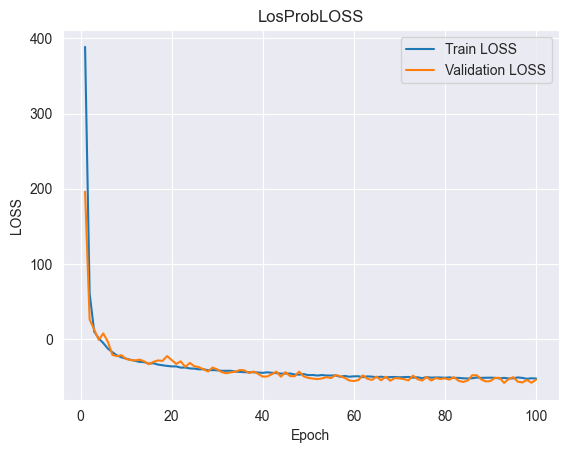

In [30]:
#plotting the Logprobloss after training
logprobloss=st.plot_loss(history_loss_train_file, history_loss_val_file, epoch_counter_train_loss_file)

In [31]:
 # Replace with the path to your history_mse_train CSV file
history_mse_train_file = './history_mse_train.csv'
# Replace with the path to your history_mse_val CSV file
history_mse_val_file = './history_mse_val.csv'
# Replace with the path to your epoch_counter_train_mse CSV file
epoch_counter_train_mse_file = './epoch_counter_train_mse.csv'

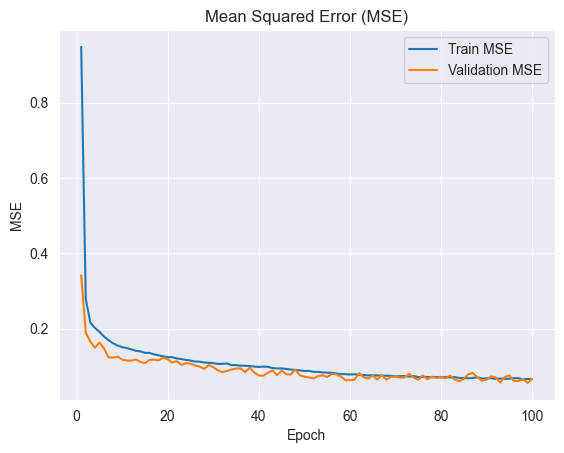

In [32]:
#plotting the MSE metric after training
msemetric=st.plot_mse(history_mse_train_file, history_mse_val_file, epoch_counter_train_mse_file)

In [33]:
# Replace with the path to your history_mae_train CSV file
history_mae_train_file = './history_mae_train.csv'
# Replace with the path to your history_mae_val CSV file
history_mae_val_file = './history_mae_val.csv'
# Replace with the path to your epoch_counter_train_mae CSV file
epoch_counter_train_mae_file = './epoch_counter_train_mae.csv'

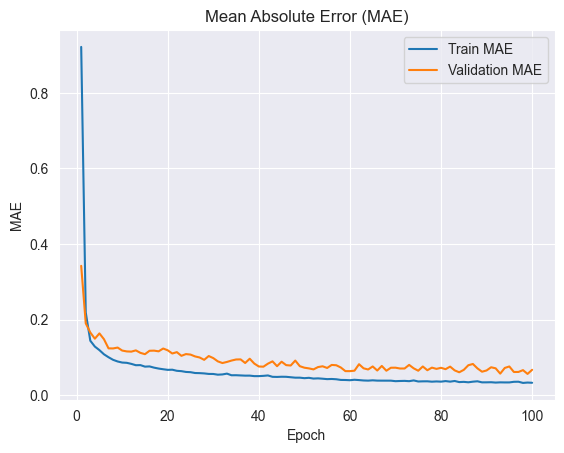

In [34]:
#plotting the MAE metric after training
maemetric=st.plot_mae(history_mae_train_file, history_mae_val_file, epoch_counter_train_mae_file)

In [35]:
save=st.save_model(model, MODEL_PATH)#saving the trained model

Based on our history plots, the model seems to be doing well both on train and validation sets. Also, 100 epochs were enough to train the model and maybe even 50 would be sufficient. Next step is to see how well will our model perform when it comes to the prediction on the "unknown" data, aka test set.